In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# utilities
def sep_layers(styl_loss_layers):
    
    # layer_loss :: {layer number: list of layer loss}
    layer_loss = {i:[] for i in range(len(styl_loss_layers[0]))}
    for step_losses in styl_loss_layers:
        for l in range(len(step_losses)):
            layer_loss[l].append(step_losses[l])
    list_arr = lambda l: {i: np.array(l[i], dtype=np.float32) for i in l}
    return list_arr(layer_loss)

def read_log(file_name):
    with open(file_name) as file:
        return json.loads(file.read())

In [30]:
# loss log file import 
file_name = "loss_400_191843_20180910.log"
loss_track = read_log("./log/"+file_name)

In [31]:
# turn json object into arrays
step = loss_track["step"] 
styl_loss = np.array(loss_track["styl_loss"], dtype=np.float32)
cont_loss = np.array(loss_track["cont_loss"], dtype=np.float32)
total_loss = np.array(loss_track["total_loss"], dtype=np.float32)
styl_loss_list = sep_layers(loss_track["styl_loss_list"])
cont_loss_list = sep_layers(loss_track["cont_loss_list"])

In [32]:
# plot functions
def plot_loss(styl_loss, cont_loss, total_loss):
    fig, (ax0, ax1, ax2) = plt.subplots(3, sharex=True, figsize=(15, 15))

    # style loss plot 
    ax0.plot(step, np.log(styl_loss), label="styl_loss", color="red")
    #ax0.axis([0, 200, 10, 30])
    ax0.legend(prop={"size":15})
    
    # content loss plot
    ax1.plot(step, np.log(cont_loss), label="cont_loss", color="orange")
    #ax1.axis([0, 200, 10, 30])
    ax1.legend(prop={"size":15})
    
    # Total loss plot
    ax2.plot(step, np.log(total_loss), label="total_loss")
    #ax2.axis([0, 200, 10, 30])
    ax2.legend(prop={"size":15})

    fig.tight_layout()
    
def plot_styl_layer_loss(styl_loss_list, layers=None):
    if not layers:
        styl_layers = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
    fig, ax = plt.subplots(len(styl_layers), sharex=True, figsize=(15, 20))
    for l, l_name in enumerate(styl_layers):
        ax[l].plot(step, styl_loss_list[l])
        ax[l].set_ylabel(l_name)
        ax[l].plot(prop={"size":15})
        
    fig.tight_layout()

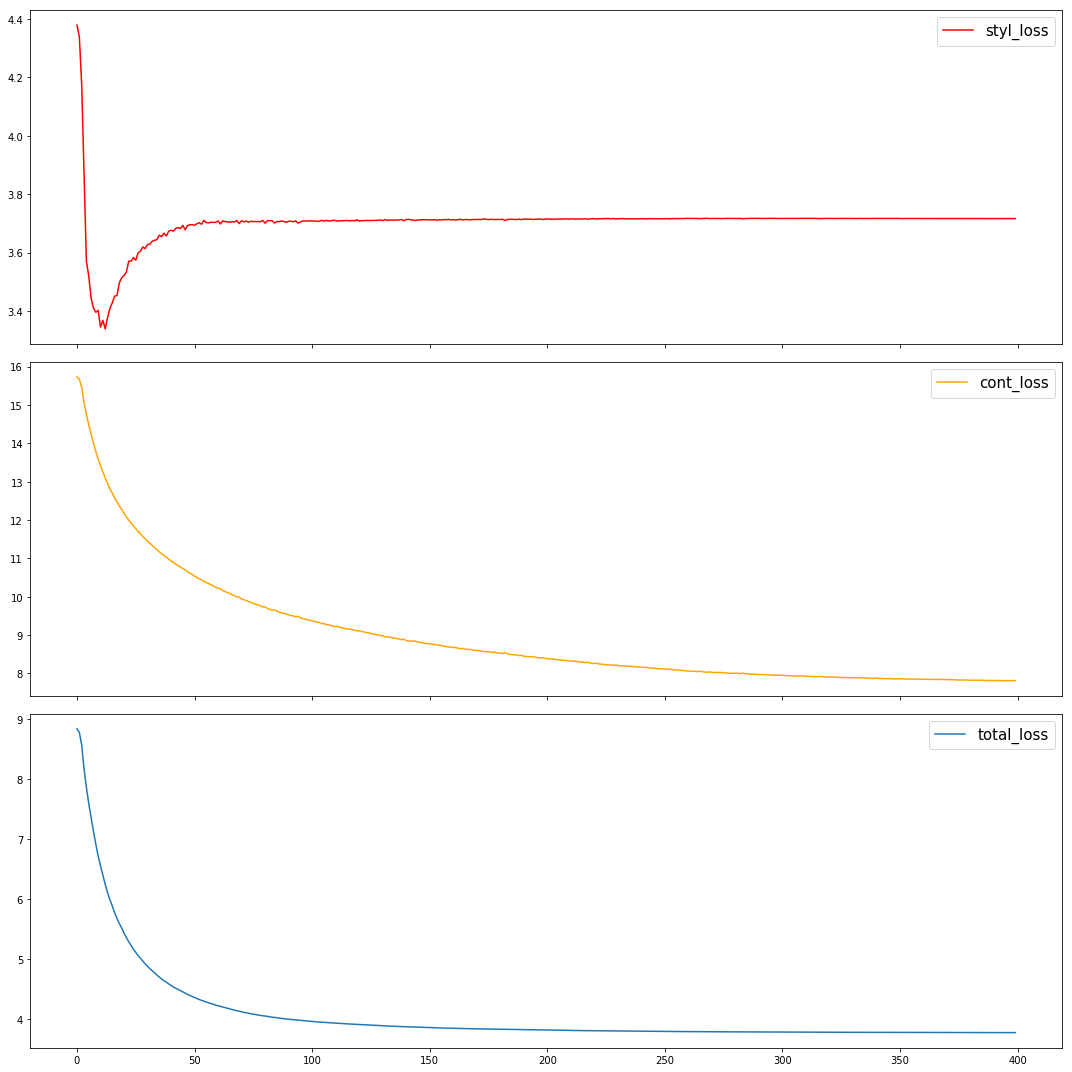

In [33]:
plot_loss(styl_loss, cont_loss, total_loss)

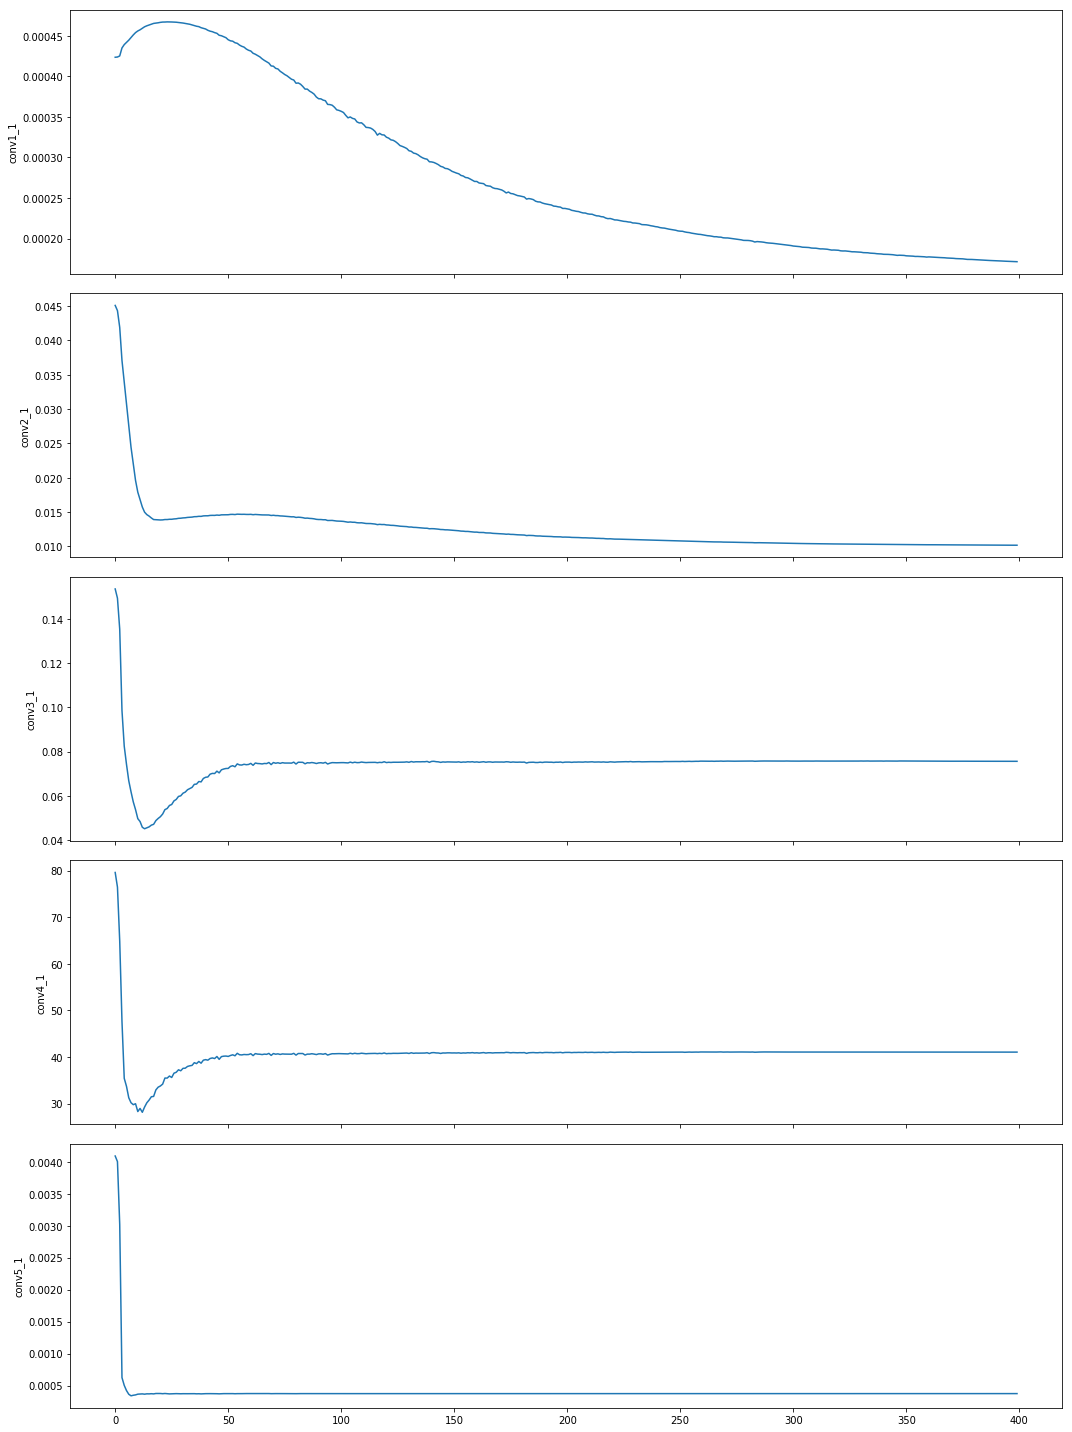

In [34]:
plot_styl_layer_loss(styl_loss_list)